**Using yfinance to extract data of stock**

**Importing libraries**

In [1]:
!pip install yfinance

  Created wheel for yfinance: filename=yfinance-0.1.59-py2.py3-none-any.whl size=23442 sha256=c9c86bd66bef8e1cfcf98a5ce681aefefbe5e7c504cad0eb05172747ee28ea5a
  Stored in directory: c:\users\dell\appdata\local\pip\cache\wheels\7e\d5\f4\f628965651f61ae35c2bdc73571ce1a2026e1550a336b5ad4b
  Created wheel for multitasking: filename=multitasking-0.0.9-py3-none-any.whl size=8368 sha256=5230b0532e39f48134aba263eca1ad638f7039b85d4c5c3a63f5080777bd19c3
  Stored in directory: c:\users\dell\appdata\local\pip\cache\wheels\57\6d\a3\a39b839cc75274d2acfb1c58bfead2f726c6577fe8c4723f13
Successfully built yfinance multitasking


In [2]:
import yfinance as yf
import pandas as pd

Using the Ticker module we can create an object that will allow us to access functions to extract data. To do this we need to provide the ticker symbol for the stock, here the company is Apple and the ticker symbol is AAPL.

In [3]:
apple = yf.Ticker("AAPL") 

Now we can access functions and variables to extract the type of data we need.

Using the attribute info we can extract information about the stock as a Python dictionary.

In [4]:
apple_info=apple.info
apple_info

{'zip': '95014',
 'sector': 'Technology',
 'fullTimeEmployees': 100000,
 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. It also sells various related services. The company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, HomePod, iPod touch, and other Apple-branded and third-party accessories. It also provides AppleCare support services; cloud services store services; and operates various platforms, including the App Store, that allow customers to discover and download applications and digital content, such as books, music, video, games, and podcasts. In addition, the company offers various services, such as Apple Arcade, a game subscription service; Apple Music, which offers users a curated listening experience with on-demand r

In [5]:
apple_info['country']

'United States'

**Extracting the Shared price**

A share is the single smallest part of a company's stock that you can buy, the prices of these shares fluctuate over time. Using the history() method we can get the share price of the stock over a certain period of time. Using the period parameter we can set how far back from the present to get data. The options for period are 1 day (1d), 5d, 1 month (1mo) , 3mo, 6mo, 1 year (1y), 2y, 5y, 10y, ytd, and max.

In [6]:
apple_share_price_data = apple.history(period="max")

The format that the data is returned in is a Pandas DataFrame. With the Date as the index the share Open, High, Low, Close, Volume, and Stock Splits are given for each day.

In [7]:
apple_share_price_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12,0.100751,0.101189,0.100751,0.100751,469033600,0.0,0.0
1980-12-15,0.095933,0.095933,0.095495,0.095495,175884800,0.0,0.0
1980-12-16,0.088923,0.088923,0.088485,0.088485,105728000,0.0,0.0
1980-12-17,0.090676,0.091114,0.090676,0.090676,86441600,0.0,0.0
1980-12-18,0.093304,0.093742,0.093304,0.093304,73449600,0.0,0.0


We can reset the index of the DataFrame with the reset_index function. We also set the inplace paramter to True so the change takes place to the DataFrame itself.

In [8]:
apple_share_price_data.reset_index(inplace=True)

We can plot the Open price against the Date:

<AxesSubplot:xlabel='Date'>

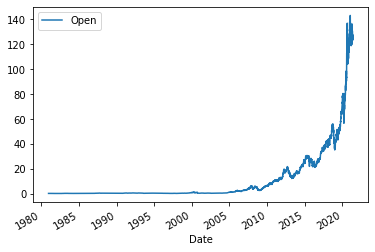

In [9]:
apple_share_price_data.plot(x="Date" , y="Open")

**Extracting Dividends**

Dividends are the distribution of a companys profits to shareholders. In this case they are defined as an amount of money returned per share an investor owns. Using the variable dividends we can get a dataframe of the data. The period of the data is given by the period defined in the 'history` function.

In [10]:
apple.dividends

Date
1987-05-11    0.000536
1987-08-10    0.000536
1987-11-17    0.000714
1988-02-12    0.000714
1988-05-16    0.000714
                ...   
2020-05-08    0.205000
2020-08-07    0.205000
2020-11-06    0.205000
2021-02-05    0.205000
2021-05-07    0.220000
Name: Dividends, Length: 71, dtype: float64

We can also plot the data.

<AxesSubplot:xlabel='Date'>

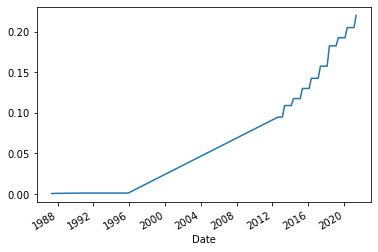

In [12]:
apple.dividends.plot()